In [3]:
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# 1. Load the model and the test features
model = joblib.load('../models/churn_model.pkl')
X_test = pd.read_csv('../data/processed/X_test.csv')

# 2. We will use a sample of 100 rows to make the explanation fast
X_sample = X_test.sample(100, random_state=42)

print("SHAP is ready to analyze the model.")

SHAP is ready to analyze the model.


In [4]:
# 1. Calculate SHAP values as before
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

# 2. Check the type of shap_values
# If it's a list, we use [1]. If it's a numpy array, we use [:, :, 1].
if isinstance(shap_values, list):
    # Old SHAP style: List of arrays
    shap_values_churn = shap_values[1]
else:
    # New SHAP style: 3D numpy array (Samples, Features, Classes)
    # We want ALL samples (:), ALL features (:), but only Class 1 (1)
    shap_values_churn = shap_values[:, :, 1]

print(f"Corrected Shape: {shap_values_churn.shape}") 
# This should now say (100, 30) or something similar (Samples, Features)

Corrected Shape: (100, 30)


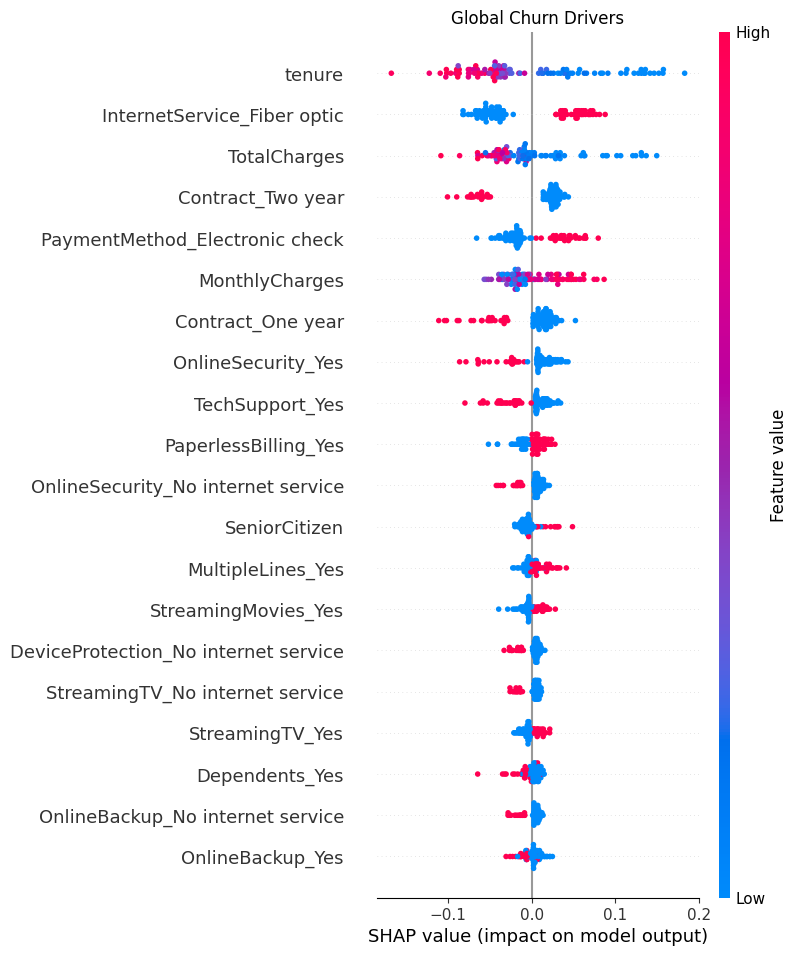

In [14]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_churn, X_sample, show=False)
plt.title("Global Churn Drivers")
plt.savefig('../explanation/global_shap_summary.png', bbox_inches='tight')
plt.show()

Customer Churn Probability: 6.00%


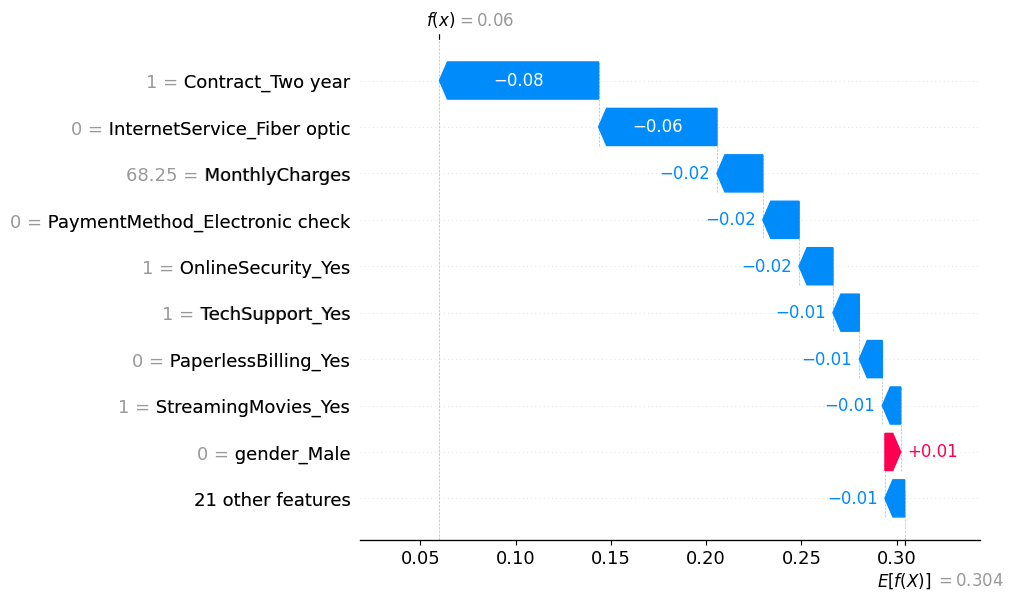

In [6]:
# Pick the first customer from the sample
customer_index = 0
customer_data = X_sample.iloc[[customer_index]]

# Get the probability for this customer
prob = model.predict_proba(customer_data)[0][1]

print(f"Customer Churn Probability: {prob:.2%}")

# Generate a Waterfall Plot for this specific customer
# (Shows how each feature pushed the probability up or down)
explainer_ind = shap.Explainer(model, X_test.astype(float))
shap_values_ind = explainer_ind(customer_data)

plt.figure()
shap.plots.waterfall(shap_values_ind[0][:, 1], show=False)
plt.savefig('../explanation/individual_explanation_sample.png', bbox_inches='tight')
plt.show()